In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import plotly.graph_objects as go
from webcolors import hex_to_rgb

# import FDA AI/ML-Enabled Devices dataset
https://www.fda.gov/medical-devices/software-medical-device-samd/artificial-intelligence-and-machine-learning-aiml-enabled-medical-devices

In [2]:
df = pd.read_excel('Artificial Intelligence and Machine Learning (AIML)-Enabled Medical Devices  FDA_modified.xlsx')
df.head(2)

,Submission ID,Date of Final Decision,Submission Number,Device,Company,Panel (Lead),Primary Product Code
0,1,07/29/2022,K213760,ABMD Software,HeartLung Corporation,Radiology,KGI
1,2,07/29/2022,K220961,Deep Learning Image Reconstruction,GE Healthcare Japan Corporation,Radiology,JAK


In [3]:
df.rename(columns = {'Primary Product Code':'PRODUCTCODE'}, inplace = True)
df.head()

,Submission ID,Date of Final Decision,Submission Number,Device,Company,Panel (Lead),PRODUCTCODE
0,1,07/29/2022,K213760,ABMD Software,HeartLung Corporation,Radiology,KGI
1,2,07/29/2022,K220961,Deep Learning Image Reconstruction,GE Healthcare Japan Corporation,Radiology,JAK
2,3,07/28/2022,K213998,cvi42 Auto Imaging Software Application,Circle Cardiovascular Imaging Inc,Radiology,QIH
3,4,07/28/2022,K221923,Swoop Portable MR Imaging System,"Hyperfine, Inc.",Radiology,LNH
4,5,07/27/2022,K210822,DeepRhythmAI,Medicalgorithmics S.A.,Cardiovascular,DQK


In [4]:
df['PRODUCTCODE'].unique()

array(['KGI', 'JAK', 'QIH', 'LNH', 'DQK', 'QAS', 'LLZ', 'IYN', 'DXH',
       'QDQ', 'JIR', 'DQD', 'PIB', 'QKB', 'QPF', 'QDB', 'QBS', 'MYN',
       'JOY', 'MUJ', 'PJA', 'QFM', 'IZL', 'MQB', 'PCS', 'POK', 'QNP',
       'OWB', 'KPS', 'QPN', 'QQI', 'OLZ', 'MXD', 'QOK', 'OEB', 'QME',
       'QNV', 'NQQ', 'QNK', 'QNL', 'POV', 'QJU', 'PRH', 'MLO', 'IYO',
       'DSI', 'DPS', 'IYE', 'MWI', 'BZG', 'QEK', 'HAW', 'QJB', 'MRZ',
       'MUD', 'GKZ', 'JAA', 'PIW', 'GXY', 'PLB', 'JFY', 'PBH', 'QER',
       'QAQ', 'PPU', 'OZE', 'DQA', 'NDC', 'QEA', 'POS', 'OMB', 'GWN',
       'JIL', 'OLO', 'QCC', 'NAY', 'OBH', 'PNN', 'DSB', 'DRG', 'DSH',
       'DPT', 'MNR', 'PTA', 'NBW', 'PBZ', 'NFJ', 'KPR', 'PEX', 'OIW',
       'MHX', 'MNM'], dtype=object)

In [5]:
len(df['PRODUCTCODE'].unique())

92

# import foiclass dataset

In [6]:
#https://www.fda.gov/medical-devices/classify-your-medical-device/download-product-code-classification-files
sb = pd.read_csv('foiclass.csv')
sb.head()

,REVIEW_PANEL,MEDICALSPECIALTY,PRODUCTCODE,DEVICENAME,DEVICECLASS,UNCLASSIFIED_REASON,GMPEXEMPTFLAG,THIRDPARTYFLAG,REVIEWCODE,REGULATIONNUMBER,SUBMISSION_TYPE_ID,DEFINITION,PHYSICALSTATE,TECHNICALMETHOD,TARGETAREA,Implant_Flag,Life_Sustain_support_flag,SummaryMalfunctionReporting
0,AN,AN,BRW,"Protector, Dental",1,NaN,N,N,NaN,868.582,4.0,NaN,NaN,NaN,NaN,N,N,Eligible
1,AN,AN,BRX,"Stool, Anesthesia",1,NaN,N,N,NaN,868.670,4.0,NaN,NaN,NaN,NaN,N,N,Eligible
2,AN,AN,BRY,"Cabinet, Table And Tray, Anesthesia",1,NaN,N,N,NaN,868.610,4.0,NaN,NaN,NaN,NaN,N,N,Eligible
3,AN,AN,BSE,"Analyzer, Gas, Helium, Gaseous-Phase",2,NaN,N,Y,NaN,868.164,1.0,NaN,NaN,NaN,NaN,N,N,Eligible
4,AN,AN,BSF,"Absorber, Carbon-Dioxide",1,NaN,N,N,NaN,868.531,4.0,NaN,NaN,NaN,NaN,N,N,Eligible


In [7]:
sb['SUBMISSION_TYPE_ID'].unique()
#1:501(k), 4: 501(k) exempt, 2: PMA, 3:Contact Doce, 6: HDE, 7: Enforcement Discretion, 8: EUA(provide by the document)

array([ 4.,  1.,  2.,  7.,  6.,  3.,  8., nan])

# product code class

## Product code from the dataset are in 501(k) class

In [8]:
sb501=pd.DataFrame(sb.loc[(sb['SUBMISSION_TYPE_ID']== 1),'PRODUCTCODE'])
sb501

,PRODUCTCODE
3,BSE
7,BSK
8,BSN
9,BSO
10,BSP
...,...
6568,LCL
6569,LCM
6572,MIG
6574,MVO


In [9]:
merged501 = pd.merge(df, sb501, on=['PRODUCTCODE'], how='inner')
merged501.shape

(517, 7)

In [10]:
# 88 product codes are in 501(k) class
len(merged501['PRODUCTCODE'].unique())

88

In [11]:
merged501['PRODUCTCODE'].unique()

array(['KGI', 'JAK', 'QIH', 'LNH', 'DQK', 'QAS', 'LLZ', 'IYN', 'DXH',
       'QDQ', 'DQD', 'PIB', 'QKB', 'QPF', 'QDB', 'QBS', 'MYN', 'JOY',
       'MUJ', 'PJA', 'QFM', 'IZL', 'MQB', 'PCS', 'POK', 'QNP', 'OWB',
       'KPS', 'QPN', 'QQI', 'OLZ', 'MXD', 'QOK', 'OEB', 'QME', 'QNV',
       'NQQ', 'QNL', 'POV', 'QJU', 'PRH', 'MLO', 'IYO', 'DSI', 'DPS',
       'IYE', 'MWI', 'BZG', 'QEK', 'HAW', 'QJB', 'MRZ', 'MUD', 'GKZ',
       'JAA', 'PIW', 'GXY', 'PLB', 'JFY', 'PBH', 'QER', 'QAQ', 'PPU',
       'OZE', 'DQA', 'NDC', 'QEA', 'POS', 'OMB', 'GWN', 'JIL', 'OLO',
       'QCC', 'NAY', 'OBH', 'PNN', 'DSB', 'DRG', 'DSH', 'DPT', 'MNR',
       'NBW', 'PBZ', 'NFJ', 'KPR', 'PEX', 'OIW', 'MHX'], dtype=object)

## Product codes from the dataset in 501(k) Exempt class

In [12]:
# 501(k) Exapmt class
sb501e=pd.DataFrame(sb.loc[(sb['SUBMISSION_TYPE_ID']== 4),'PRODUCTCODE'])
sb501e

,PRODUCTCODE
0,BRW
1,BRX
2,BRY
4,BSF
5,BSI
...,...
6558,PVG
6559,PVH
6560,PVI
6561,PVJ


In [13]:
# 2 product codes are in 501(k) exampt class
merged501e = pd.merge(df, sb501e, on=['PRODUCTCODE'], how='inner')
merged501e.shape

(2, 7)

In [14]:
merged501e['PRODUCTCODE'].unique()

array(['JIR', 'PTA'], dtype=object)

## Product codes from dataset that are in PMA class

In [15]:
# PMA class
sbpma=pd.DataFrame(sb.loc[(sb['SUBMISSION_TYPE_ID']== 2),'PRODUCTCODE'])
sbpma

,PRODUCTCODE
30,BWL
128,JED
132,JEZ
221,GZE
225,BSD
...,...
6246,PKY
6247,PUV
6571,MGX
6579,PGE


In [16]:
# 2 product codes are in PMA class
mergedpma = pd.merge(df, sbpma, on=['PRODUCTCODE'], how='inner')
mergedpma.shape

(2, 7)

In [17]:
mergedpma['PRODUCTCODE'].unique()

array(['QNK', 'MNM'], dtype=object)

# EDA

In [18]:
df.head()

,Submission ID,Date of Final Decision,Submission Number,Device,Company,Panel (Lead),PRODUCTCODE
0,1,07/29/2022,K213760,ABMD Software,HeartLung Corporation,Radiology,KGI
1,2,07/29/2022,K220961,Deep Learning Image Reconstruction,GE Healthcare Japan Corporation,Radiology,JAK
2,3,07/28/2022,K213998,cvi42 Auto Imaging Software Application,Circle Cardiovascular Imaging Inc,Radiology,QIH
3,4,07/28/2022,K221923,Swoop Portable MR Imaging System,"Hyperfine, Inc.",Radiology,LNH
4,5,07/27/2022,K210822,DeepRhythmAI,Medicalgorithmics S.A.,Cardiovascular,DQK


In [19]:
df.shape

(521, 7)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Submission ID           521 non-null    int64 
 1   Date of Final Decision  521 non-null    object
 2   Submission Number       521 non-null    object
 3   Device                  521 non-null    object
 4   Company                 521 non-null    object
 5   Panel (Lead)            521 non-null    object
 6   PRODUCTCODE             521 non-null    object
dtypes: int64(1), object(6)
memory usage: 28.6+ KB


<AxesSubplot: >

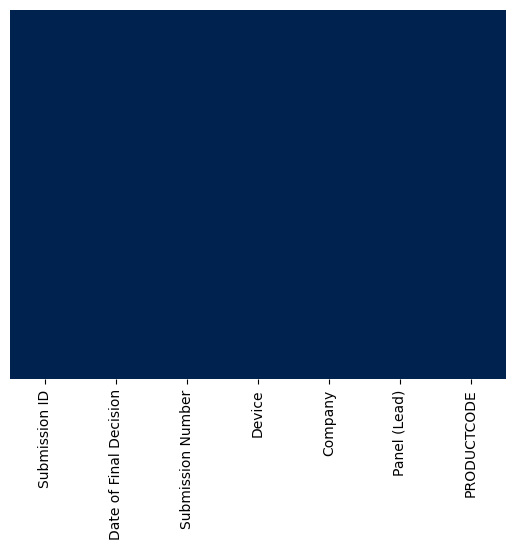

In [21]:
#checking null value
#df.isnull().sum()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='cividis')

In [22]:
df['Company'].value_counts()

Siemens Medical Solutions USA, Inc.                                21
Canon Medical Systems Corporation                                  15
Aidoc Medical, Ltd.                                                13
Zebra Medical Vision Ltd.                                           9
GE Medical Systems Ultrasound and Primary Care Diagnostics, LLC     7
                                                                   ..
Hyperfine Research, Inc.                                            1
AI Metrics, LLC                                                     1
Resonance Health Analysis Services Pty Ltd.                         1
NICo-Lab B.V.                                                       1
Neuromedical Systems, Inc.                                          1
Name: Company, Length: 342, dtype: int64

In [23]:
df['Panel (Lead)'].value_counts()

Radiology                      392
Cardiovascular                  57
Hematology                      15
Neurology                       14
Ophthalmic                       7
Clinical Chemistry               6
General And Plastic Surgery      5
Microbiology                     5
Pathology                        4
Gastroenterology-Urology         4
Anesthesiology                   4
General Hospital                 3
Gastroenterology & Urology       2
Obstetrics And Gynecology        1
Orthopedic                       1
Dental                           1
Name: Panel (Lead), dtype: int64

In [24]:
# 'Gastroenterology & Urology','Gastroenterology-Urology' are same terms
df['Panel (Lead)'].replace('Gastroenterology & Urology','Gastroenterology-Urology', inplace=True)

In [25]:
df['Panel (Lead)'].unique()

array(['Radiology', 'Cardiovascular', 'Clinical Chemistry', 'Ophthalmic',
       'Neurology', 'Hematology', 'Gastroenterology-Urology', 'Pathology',
       'General And Plastic Surgery', 'Microbiology', 'Anesthesiology',
       'General Hospital', 'Obstetrics And Gynecology', 'Orthopedic',
       'Dental'], dtype=object)

In [26]:
df['Panel (Lead)'].value_counts()

Radiology                      392
Cardiovascular                  57
Hematology                      15
Neurology                       14
Ophthalmic                       7
Clinical Chemistry               6
Gastroenterology-Urology         6
General And Plastic Surgery      5
Microbiology                     5
Pathology                        4
Anesthesiology                   4
General Hospital                 3
Obstetrics And Gynecology        1
Orthopedic                       1
Dental                           1
Name: Panel (Lead), dtype: int64

[Text(0, 0, 'Radiology'),
 Text(1, 0, 'Cardiovascular'),
 Text(2, 0, 'Clinical Chemistry'),
 Text(3, 0, 'Ophthalmic'),
 Text(4, 0, 'Neurology'),
 Text(5, 0, 'Hematology'),
 Text(6, 0, 'Gastroenterology-Urology'),
 Text(7, 0, 'Pathology'),
 Text(8, 0, 'General And Plastic Surgery'),
 Text(9, 0, 'Microbiology'),
 Text(10, 0, 'Anesthesiology'),
 Text(11, 0, 'General Hospital'),
 Text(12, 0, 'Obstetrics And Gynecology'),
 Text(13, 0, 'Orthopedic'),
 Text(14, 0, 'Dental')]

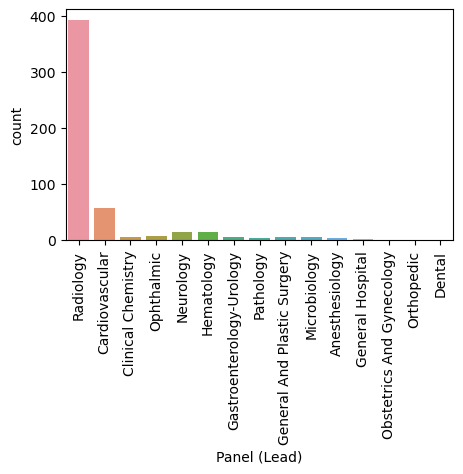

In [27]:
#'Panel(Lead)' countplot
plt.figure(figsize=(5,3))
ax = sns.countplot(data = df, x = 'Panel (Lead)')
ax.set_xticklabels(['Radiology', 'Cardiovascular', 'Clinical Chemistry', 'Ophthalmic',
       'Neurology', 'Hematology', 'Gastroenterology-Urology', 'Pathology',
       'General And Plastic Surgery', 'Microbiology', 'Anesthesiology',
       'General Hospital', 'Obstetrics And Gynecology', 'Orthopedic',
       'Dental'], rotation=90)

In [28]:
#Add columns 'year'
df['year'] = pd.to_datetime(df['Date of Final Decision']).dt.year

In [29]:
df.year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2008, 2004, 2001, 1997, 1995])

[Text(0, 0, '1995'),
 Text(1, 0, '1997'),
 Text(2, 0, '2001'),
 Text(3, 0, '2004'),
 Text(4, 0, '2008'),
 Text(5, 0, '2010'),
 Text(6, 0, '2011'),
 Text(7, 0, '2012'),
 Text(8, 0, '2013'),
 Text(9, 0, '2014'),
 Text(10, 0, '2015'),
 Text(11, 0, '2016'),
 Text(12, 0, '2017'),
 Text(13, 0, '2018'),
 Text(14, 0, '2019'),
 Text(15, 0, '2020'),
 Text(16, 0, '2021'),
 Text(17, 0, '2022')]

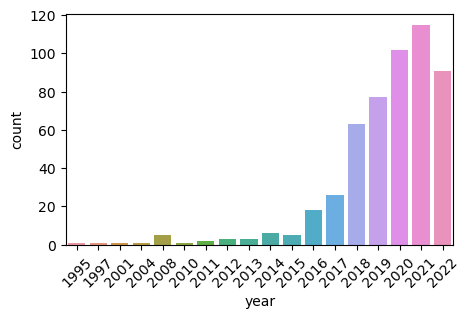

In [30]:
#'year' countplot, count increased after 2016, appared a jump starting in 2020
plt.figure(figsize=(5,3))
axy = sns.countplot(data = df, x = 'year')
axy.set_xticklabels([1995,1997,2001,2004,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022], rotation=45)

In [44]:
df['weight'] = df['Panel (Lead)'].map({'Radiology':392,'Cardiovascular':57,'Hematology':15,'Neurology':14,
'Ophthalmic':7,'Clinical Chemistry':6,'Gastroenterology-Urology':6,'General And Plastic Surgery':5,
'Microbiology':5,'Pathology':4,'Anesthesiology':4,'General Hospital':3,'Obstetrics And Gynecology':1,
                               'Orthopedic':1,'Dental':1})

In [31]:
df['weight2'] = df['year'].map({2022:91, 2021:115, 2020:102, 2019:77, 2018:63, 2017:26, 2016:18, 2015:5, 2014:6, 2013:3, 2012:3,
       2011:2, 2010:1, 2008:5, 2004:1, 2001:1, 1997:1, 1995:1})

In [32]:
#Add column submission category
df['submission category'] = df['PRODUCTCODE']

In [33]:
df['submission category'].replace(['KGI', 'JAK', 'QIH', 'LNH', 'DQK', 'QAS', 'LLZ', 'IYN', 'DXH',
       'QDQ', 'DQD', 'PIB', 'QKB', 'QPF', 'QDB', 'QBS', 'MYN', 'JOY',
       'MUJ', 'PJA', 'QFM', 'IZL', 'MQB', 'PCS', 'POK', 'QNP', 'OWB',
       'KPS', 'QPN', 'QQI', 'OLZ', 'MXD', 'QOK', 'OEB', 'QME', 'QNV',
       'NQQ', 'QNL', 'POV', 'QJU', 'PRH', 'MLO', 'IYO', 'DSI', 'DPS',
       'IYE', 'MWI', 'BZG', 'QEK', 'HAW', 'QJB', 'MRZ', 'MUD', 'GKZ',
       'JAA', 'PIW', 'GXY', 'PLB', 'JFY', 'PBH', 'QER', 'QAQ', 'PPU',
       'OZE', 'DQA', 'NDC', 'QEA', 'POS', 'OMB', 'GWN', 'JIL', 'OLO',
       'QCC', 'NAY', 'OBH', 'PNN', 'DSB', 'DRG', 'DSH', 'DPT', 'MNR',
       'NBW', 'PBZ', 'NFJ', 'KPR', 'PEX', 'OIW', 'MHX'],'501(k)', inplace=True)

In [34]:
df['submission category'].replace(['JIR', 'PTA'],'501(k)e', inplace=True)

In [35]:
df['submission category'].replace(['QNK', 'MNM'],'PMA', inplace=True)

In [36]:
df['submission category'].unique()

array(['501(k)', '501(k)e', 'PMA'], dtype=object)

In [37]:
df['submission category'].isnull().sum()

0

In [45]:
df.head()

,Submission ID,Date of Final Decision,Submission Number,Device,Company,Panel (Lead),PRODUCTCODE,year,weight2,submission category,weight
0,1,07/29/2022,K213760,ABMD Software,HeartLung Corporation,Radiology,KGI,2022,91,501(k),392
1,2,07/29/2022,K220961,Deep Learning Image Reconstruction,GE Healthcare Japan Corporation,Radiology,JAK,2022,91,501(k),392
2,3,07/28/2022,K213998,cvi42 Auto Imaging Software Application,Circle Cardiovascular Imaging Inc,Radiology,QIH,2022,91,501(k),392
3,4,07/28/2022,K221923,Swoop Portable MR Imaging System,"Hyperfine, Inc.",Radiology,LNH,2022,91,501(k),392
4,5,07/27/2022,K210822,DeepRhythmAI,Medicalgorithmics S.A.,Cardiovascular,DQK,2022,91,501(k),57


In [46]:
#pip install chart_studio

In [47]:
df2 = df.groupby(['year','submission category','Panel (Lead)']).agg({'weight':'count'}).reset_index()

In [48]:
print(df2.to_string())

    year submission category                 Panel (Lead)  weight
0   1995                 PMA                    Pathology       1
1   1997              501(k)               Anesthesiology       1
2   2001              501(k)                   Hematology       1
3   2004              501(k)                   Hematology       1
4   2008              501(k)               Cardiovascular       1
5   2008              501(k)                   Hematology       1
6   2008              501(k)                    Pathology       1
7   2008              501(k)                    Radiology       2
8   2010              501(k)                   Hematology       1
9   2011              501(k)                   Hematology       1
10  2011              501(k)                    Radiology       1
11  2012              501(k)                    Pathology       1
12  2012              501(k)                    Radiology       2
13  2013              501(k)                   Hematology       1
14  2013  

In [42]:
df.head()

,Submission ID,Date of Final Decision,Submission Number,Device,Company,Panel (Lead),PRODUCTCODE,year,weight2,submission category
0,1,07/29/2022,K213760,ABMD Software,HeartLung Corporation,Radiology,KGI,2022,91,501(k)
1,2,07/29/2022,K220961,Deep Learning Image Reconstruction,GE Healthcare Japan Corporation,Radiology,JAK,2022,91,501(k)
2,3,07/28/2022,K213998,cvi42 Auto Imaging Software Application,Circle Cardiovascular Imaging Inc,Radiology,QIH,2022,91,501(k)
3,4,07/28/2022,K221923,Swoop Portable MR Imaging System,"Hyperfine, Inc.",Radiology,LNH,2022,91,501(k)
4,5,07/27/2022,K210822,DeepRhythmAI,Medicalgorithmics S.A.,Cardiovascular,DQK,2022,91,501(k)


# Sanky plot
in plotly

In [49]:
# Setup our colours
color_link = ['#000000', '#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46',
             '#008941', '#006FA6', '#A30059','#FFDBE5', '#7A4900', 
             '#0000A6', '#63FFAC', '#B79762', '#004D43', '#8FB0FF',
             '#997D87', '#5A0007', '#809693', '#FEFFE6', '#1B4400', 
             '#4FC601', '#3B5DFF', '#4A3B53', '#FF2F80', '#61615A',
             '#BA0900', '#6B7900', '#00C2A0', '#FFAA92', '#FF90C9',
             '#B903AA', '#D16100', '#DDEFFF', '#000035', '#7B4F4B',                
             '#A1C299', '#300018', '#0AA6D8', '#013349', '#00846F',
             '#372101', '#FFB500', '#C2FFED', '#A079BF', '#CC0744',
             '#C0B9B2', '#C2FF99', '#001E09', '#00489C', '#6F0062', 
             '#0CBD66', '#EEC3FF', '#456D75', '#B77B68', '#7A87A1',
             '#788D66', '#885578', '#FAD09F', '#FF8A9A', '#D157A0',
             '#BEC459', '#456648', '#0086ED', '#886F4C', '#34362D', 
             '#B4A8BD', '#00A6AA', '#452C2C', '#636375', '#A3C8C9', 
             '#FF913F', '#938A81', '#575329', '#00FECF', '#B05B6F',
             '#8CD0FF', '#3B9700', '#04F757', '#C8A1A1', '#1E6E00',
             '#7900D7', '#A77500', '#6367A9', '#A05837', '#6B002C',
             '#772600', '#D790FF', '#9B9700', '#549E79', '#FFF69F', 
             '#201625', '#72418F', '#BC23FF', '#99ADC0', '#3A2465',
             '#922329', '#5B4534', '#FDE8DC', '#404E55', '#0089A3',
             '#CB7E98', '#A4E804', '#324E72', '#6A3A4C'
             ]

# Collect the data we need from a dataframe to populate our Sankey data-source, target, value
def get_sankey_data(dataframe, cols, values):
    sankey_data = {'label': [], 'source': [], 'target':[], 'value': []} #empty list to hold our data
   
    cnt = 0 # set the counter to zero
    
    while (cnt < len(cols) -1):
        for parent in df[cols[cnt]].unique():
            sankey_data['label'].append(parent)
            for sub in df[df[cols[cnt]] == parent][cols[cnt+1]].unique():
                sankey_data['source'].append(sankey_data['label'].index(parent))
                sankey_data['label'].append(sub)
                sankey_data['target'].append(sankey_data['label'].index(sub))
                sankey_data['value'].append(df[df[cols[cnt+1]] == sub][values].sum())
        cnt +=1
    return sankey_data

# create RGBA colors for our links, which enables us to have semi opaque links which in turn allow us to see flows without being obscured by solid colours
rgb_link_color = ['rgba({}, {}, {}, 0.4)'.format(hex_to_rgb(x)[0],
                                                 hex_to_rgb(x)[1],
                                                 hex_to_rgb(x)[2]) for x in color_link]

# call get_sankey_data function-dataframe, columns, values
sankey_chart = get_sankey_data(df, ['year', 'PRODUCTCODE', 'Panel (Lead)'], 'weight2')

# style Sankey chart
data = go.Sankey(node = dict(
                             pad = 10,
                             thickness = 20, 
                             line = dict(color = "black", width = 0.5),
                             label = sankey_chart['label'],
                             color = "goldenrod"
                             ),
                link = dict(
                            source = sankey_chart['source'],
                            target = sankey_chart['target'],
                            value = sankey_chart['value'],
                            color = color_link
                ))

#prepare our chart
fig = go.Figure(data)

#update chart with some customizations
fig.update_layout(
                  hovermode='x',
                  title='Sankey -Example', font=dict(size=10, color='white'),
                  paper_bgcolor = '#51504f',
                  height=1500, margin={'t':50, 'b':20}
)

#display chart
fig.show()

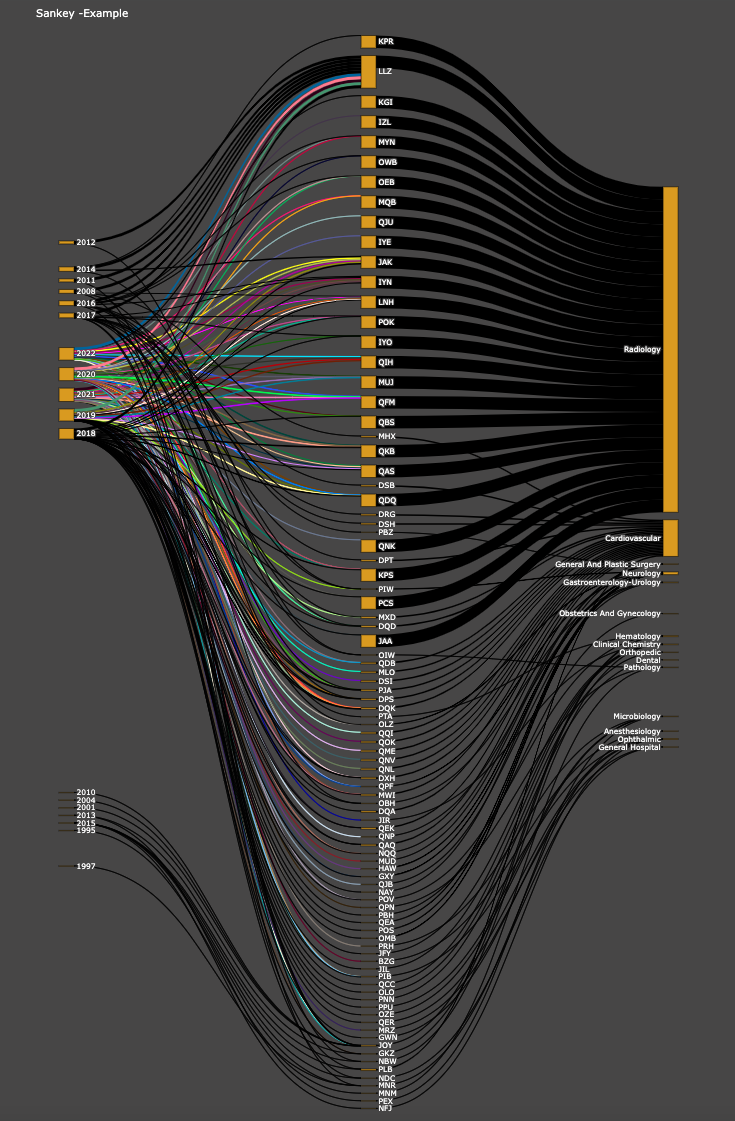